# What is the most suicidal state in the US? 

In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(repr)
library(reshape2)
library(stringr)

options(repr.plot.width=9, repr.plot.height=5)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
deaths <- read.csv("death.csv")
head(deaths)

Year,X113.Cause.Name,Cause.Name,State,Deaths,Age.adjusted.Death.Rate
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Alabama,2313,52.2
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Alaska,294,55.9
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Arizona,2214,44.8
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Arkansas,1287,47.6
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,California,9198,28.7
1999,"Accidents (unintentional injuries) (V01-X59,Y85-Y86)",Unintentional Injuries,Colorado,1519,39.0


Suicides in the United States from 1999 to 2015

In [3]:
suicide_usa <- deaths %>% 
    filter(State == "United States", Cause.Name == "Suicide") %>%
    arrange(desc(Deaths)) %>%
    select (-c(X113.Cause.Name))
suicide_usa

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate
2015,Suicide,United States,44193,13.3
2014,Suicide,United States,42826,13.0
2013,Suicide,United States,41149,12.6
2012,Suicide,United States,40600,12.6
2011,Suicide,United States,39518,12.3
2010,Suicide,United States,38364,12.1
2009,Suicide,United States,36909,11.8
2008,Suicide,United States,36035,11.6
2007,Suicide,United States,34598,11.3
2006,Suicide,United States,33300,11.0


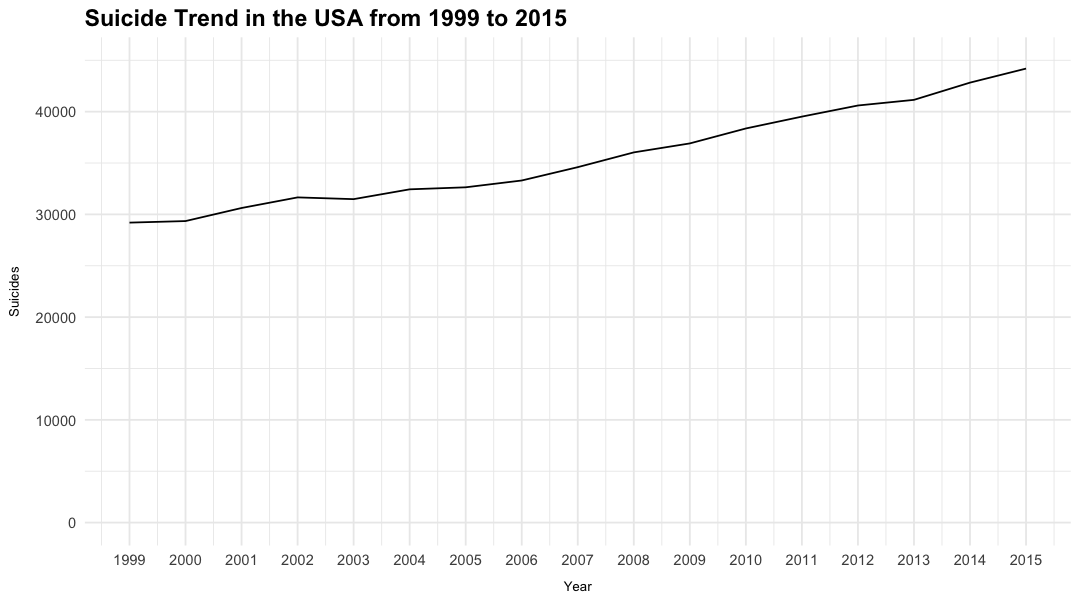

In [4]:
ggplot(suicide_usa, aes(x=Year, y=Deaths)) +
geom_line() +
scale_x_continuous(breaks = seq(1999, 2015, 1)) +
scale_y_continuous(limits = c(0, 45000)) + 
labs(y="Suicides", title="Suicide Trend in the USA from 1999 to 2015") +
theme_minimal() + 
theme(plot.title = element_text(size = 14, face = "bold"), axis.title = element_text(size = 8),
      axis.title.y = element_text(margin=margin(t = 0, r = 10, b = 0, l = 0)),
      axis.title.x = element_text(margin=margin(t = 10, r = 0, b = 0, l = 0)))

In [5]:
suicide_top10 <- deaths %>% 
    filter(Year == "2015", Cause.Name == "Suicide", Deaths < 44000) %>%
    arrange(desc(Deaths)) %>%
    select (-c(X113.Cause.Name))
suicide_top10

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate
2015,Suicide,California,4167,10.3
2015,Suicide,Texas,3403,12.5
2015,Suicide,Florida,3205,14.4
2015,Suicide,Pennsylvania,1894,14.0
2015,Suicide,New York,1652,7.8
2015,Suicide,Ohio,1650,13.9
2015,Suicide,Michigan,1410,13.8
2015,Suicide,North Carolina,1406,13.4
2015,Suicide,Illinois,1363,10.3
2015,Suicide,Georgia,1317,12.7


In [6]:
population <- read.csv("pop2.csv") %>% 
    filter(Year.id == "est72015", Sex.display.label == "Both Sexes", Hisp.display.label == "Total") %>%
    rename(State=GEO.display.label) %>%
    arrange(desc(totpop)) %>%
    select (-c(GEO.id2, Hisp.id, Year.display.label, Sex.id, Sex.display.label, Hisp.display.label, GEO.id, wa, ba, ia, aa, na, tom)) 
head(population)

Year.id,State,totpop
est72015,Michigan,9917715
est72015,Delaware,944076
est72015,New Jersey,8935421
est72015,South Dakota,857919
est72015,Virginia,8367587
est72015,North Dakota,756835


In [7]:
suicide_percents <- suicide_top10 %>% 
    inner_join(population, by="State") %>% mutate(
    population = as.numeric(as.character(totpop)),
    suicide_per_100K = ((Deaths/population)*100000)
) %>%
arrange(desc(suicide_per_100K)) %>%
filter(suicide_per_100K > 19.35)
suicide_percents

Warning message:
“Column `State` joining factors with different levels, coercing to character vector”

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate,Year.id,totpop,population,suicide_per_100K
2015,Suicide,Alaska,201,26.9,est72015,737709,737709,27.24652
2015,Suicide,Wyoming,157,28.0,est72015,586555,586555,26.76646
2015,Suicide,Montana,272,25.3,est72015,1032073,1032073,26.35472
2015,Suicide,New Mexico,500,23.7,est72015,2080328,2080328,24.03467
2015,Suicide,Idaho,359,22.1,est72015,1652828,1652828,21.72035
2015,Suicide,Utah,630,22.4,est72015,2990632,2990632,21.06578
2015,Suicide,Oklahoma,790,20.3,est72015,3907414,3907414,20.21798
2015,Suicide,South Dakota,173,20.4,est72015,857919,857919,20.16507
2015,Suicide,Colorado,1093,19.5,est72015,5448819,5448819,20.05939
2015,Suicide,Arkansas,577,19.1,est72015,2977853,2977853,19.37638


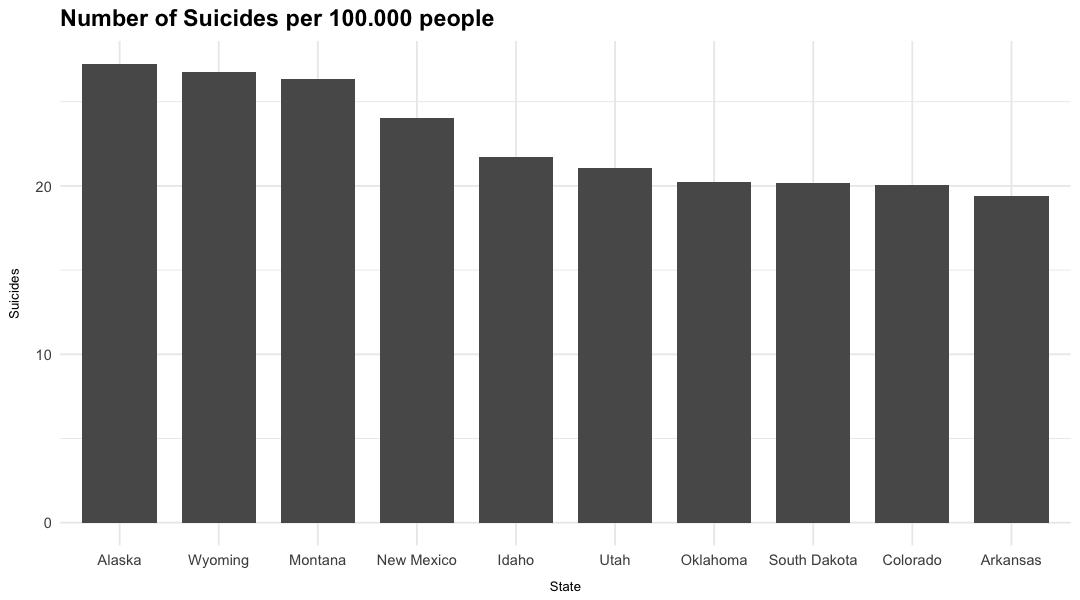

In [8]:
ggplot(suicide_percents, aes(reorder(State, -suicide_per_100K), weight=suicide_per_100K)) +
geom_bar(width=0.75) +
labs(title = "Number of Suicides per 100.000 people ", x="State", y="Suicides") +
theme_minimal() +
theme(plot.title = element_text(size = 14, face = "bold"), axis.title = element_text(size = 8),
      axis.title.y = element_text(margin=margin(t = 0, r = 10, b = 0, l = 0)),
      axis.title.x = element_text(margin=margin(t = 10, r = 0, b = 0, l = 0)))

In [9]:
suicide_lattice <- deaths %>% 
    filter(Cause.Name == "Suicide") %>%
    filter(State == "Alaska" | State == "Wyoming" | State == "Montana" | State == "New Mexico" | State == "Idaho" | State == "Utah" | State == "Oklahoma" | State == "South Dakota" | State == "Colorado" | State == "Arkansas") %>%
    arrange(desc(Deaths)) %>%
    select (-c(X113.Cause.Name))
head(suicide_lattice)

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate
2015,Suicide,Colorado,1093,19.5
2014,Suicide,Colorado,1083,19.9
2012,Suicide,Colorado,1052,19.7
2013,Suicide,Colorado,1007,18.6
2009,Suicide,Colorado,941,18.7
2011,Suicide,Colorado,913,17.5


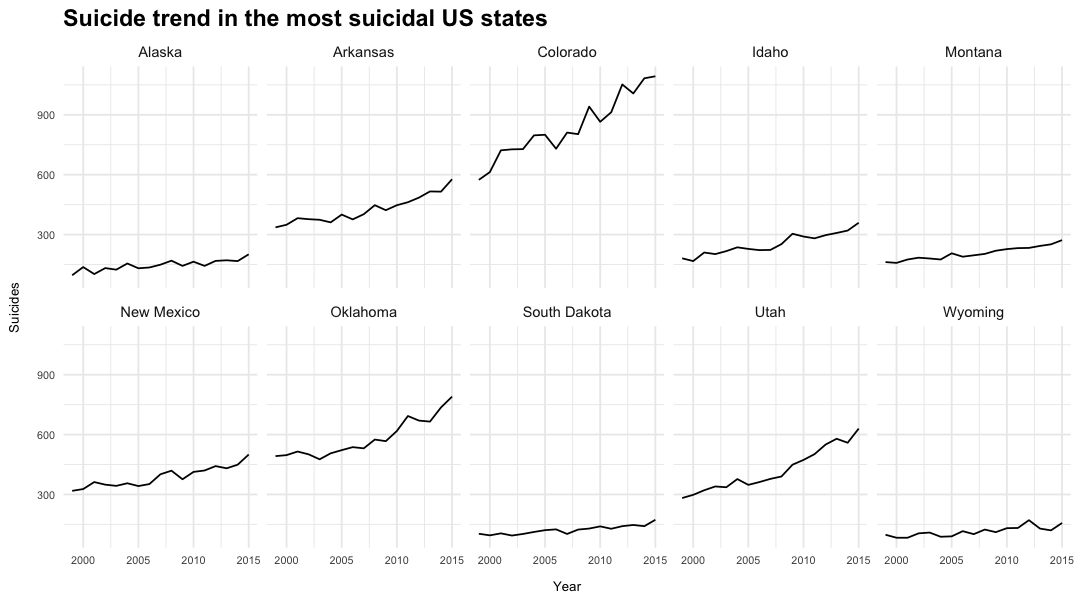

In [10]:
ggplot(suicide_lattice, aes(x=Year, y=Deaths, group=1)) +
geom_line() +
labs(x="Year", y="Suicides", title="Suicide trend in the most suicidal US states") +
facet_wrap(~State, nrow=2, ncol=5) +
theme_minimal() + 
theme(plot.title = element_text(size = 14, face = "bold"), axis.title = element_text(size = 8), axis.text = element_text(size = 6.5),
      axis.title.y = element_text(margin=margin(t = 0, r = 10, b = 0, l = 0)),
      axis.title.x = element_text(margin=margin(t = 10, r = 0, b = 0, l = 0))) 

In [11]:
temperatures <- read.csv("temperatures.csv")
head(temperatures)

State,Avg..F,Avg..C,Rank
Alabama,62.8,17.1,7
Alaska,26.6,-3.0,50
Arizona,60.3,15.7,10
Arkansas,60.4,15.8,9
California,59.4,15.2,12
Colorado,45.1,7.3,39


In [12]:
mean(temperatures[["Avg..F"]])

[1] 51.944

In [13]:
suicide_per100k <- suicide_top10 %>% 
    inner_join(population, by="State") %>% mutate(
    population = as.numeric(as.character(totpop)),
    suicide_per_100K = ((Deaths/population)*100000)
) %>%
arrange(desc(suicide_per_100K))
head(suicide_per100k)

Warning message:
“Column `State` joining factors with different levels, coercing to character vector”

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate,Year.id,totpop,population,suicide_per_100K
2015,Suicide,Alaska,201,26.9,est72015,737709,737709,27.24652
2015,Suicide,Wyoming,157,28.0,est72015,586555,586555,26.76646
2015,Suicide,Montana,272,25.3,est72015,1032073,1032073,26.35472
2015,Suicide,New Mexico,500,23.7,est72015,2080328,2080328,24.03467
2015,Suicide,Idaho,359,22.1,est72015,1652828,1652828,21.72035
2015,Suicide,Utah,630,22.4,est72015,2990632,2990632,21.06578


In [14]:
suicide_bubble <- temperatures %>% 
    inner_join(suicide_per100k, by="State") 
head(suicide_bubble)

Warning message:
“Column `State` joining factor and character vector, coercing into character vector”

State,Avg..F,Avg..C,Rank,Year,Cause.Name,Deaths,Age.adjusted.Death.Rate,Year.id,totpop,population,suicide_per_100K
Alabama,62.8,17.1,7,2015,Suicide,750,14.9,est72015,4853875,4853875,15.45157
Alaska,26.6,-3.0,50,2015,Suicide,201,26.9,est72015,737709,737709,27.24652
Arizona,60.3,15.7,10,2015,Suicide,1276,18.2,est72015,6817565,6817565,18.71636
Arkansas,60.4,15.8,9,2015,Suicide,577,19.1,est72015,2977853,2977853,19.37638
California,59.4,15.2,12,2015,Suicide,4167,10.3,est72015,38993940,38993940,10.68628
Colorado,45.1,7.3,39,2015,Suicide,1093,19.5,est72015,5448819,5448819,20.05939


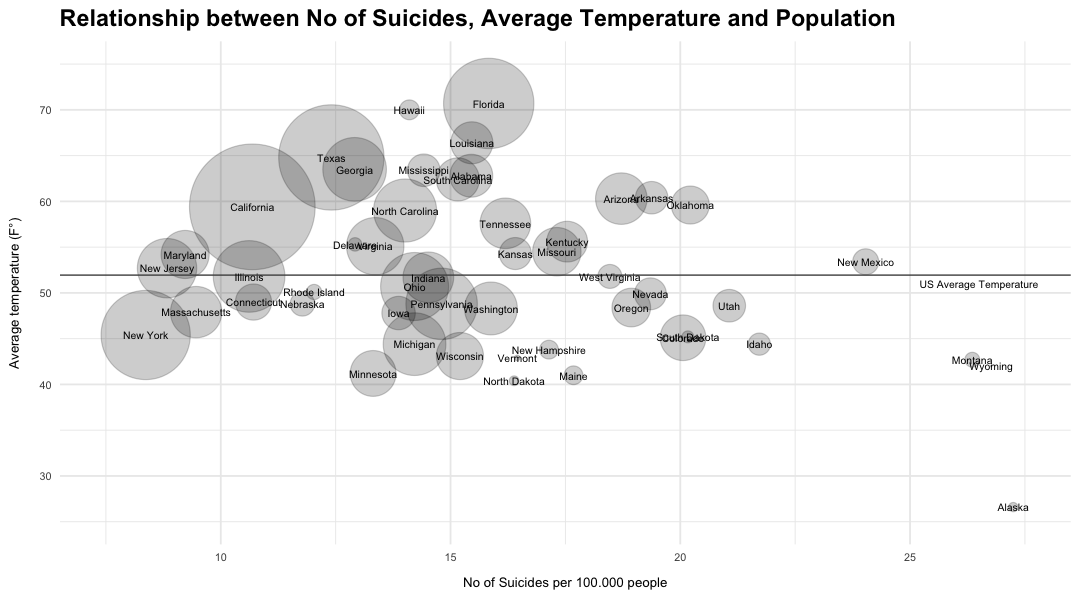

In [15]:
ggplot(suicide_bubble, aes(x = suicide_per_100K, y = Avg..F, size = population, label = State)) +
geom_point(alpha=0.2) +
scale_size_continuous(range=c(0.1, 35)) +
scale_colour_continuous(guide = FALSE) + 
geom_hline(yintercept=51.944, color="grey32", size=.4) +
annotate("text", x=26.5, y=51, label="US Average Temperature", size=2.2) + 
geom_text(size=2.2) + #, check_overlap = TRUE) + 
scale_x_continuous(limits=c(7.5,27.5)) + 
scale_y_continuous(limits=c(25,75)) + 
labs(title="Relationship between No of Suicides, Average Temperature and Population",x="No of Suicides per 100.000 people", y="Average temperature (F°)", size = "States population") +
theme_minimal() + 
theme(plot.title = element_text(size = 14, face = "bold"), axis.title = element_text(size = 8), axis.text = element_text(size = 6.5),
      axis.title.y = element_text(margin=margin(t = 0, r = 10, b = 0, l = 0)),
      axis.title.x = element_text(margin=margin(t = 10, r = 0, b = 0, l = 0)),
      legend.position = "none", #legend.direction = "horizontal",
      legend.key.size = unit(0.1, "cm"),
      legend.key.width = unit(0.01, "cm"),
      legend.key.height = unit(0.01, "cm"),
      legend.text = element_blank()) 